In [2]:
import os
import cv2
import math
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')

In [22]:
image_path = 'S005_001_00000001.PNG'

In [25]:
raw_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
raw_image_clahe = clahe.apply(raw_image)

scale_factor = 1.25
faces = face_cascade.detectMultiScale(raw_image_clahe, scale_factor, 5)
while not len(faces):
    scale_factor -= 0.02
    faces = face_cascade.detectMultiScale(raw_image_clahe, scale_factor, 5)
    if scale_factor <= 1:
        print(image_path)
        break
for (x,y,w,h) in faces:
        face = cv2.resize(raw_image_clahe[y:y+h, x:x+w], (128, 128), interpolation=cv2.INTER_AREA)

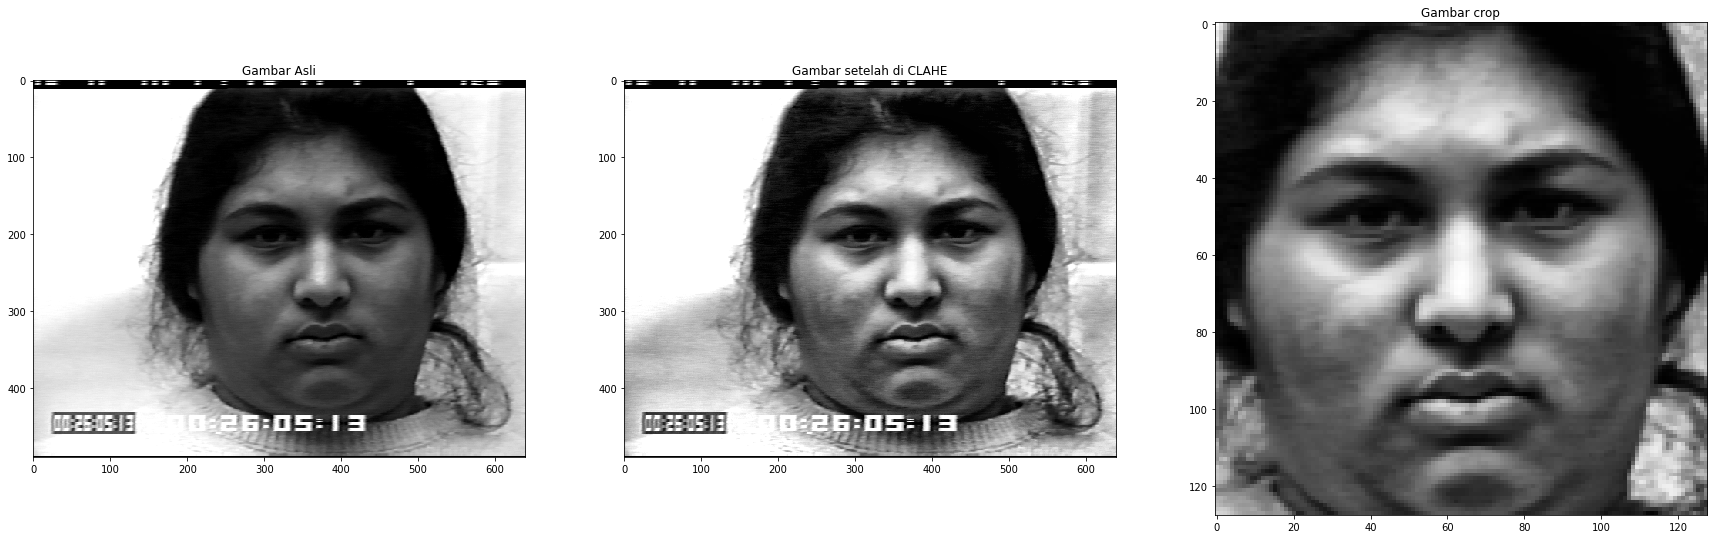

In [34]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(raw_image, cmap='gray')
plt.title('Gambar Asli')
plt.subplot(1,3,2)
plt.imshow(raw_image_clahe, cmap='gray')
plt.title('Gambar setelah di CLAHE')
plt.subplot(1,3,3)
plt.imshow(face, cmap='gray')
plt.title('Gambar crop')
plt.savefig('./reports/img/proses-gambar.png', format="png")